In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def plot_summary_helper(stats:pd.DataFrame, grid:bool=False, save_as:str=None, ):
    x = stats.Epoch

    plt.figure(figsize=(15, 10))

    plt.subplot(221)
    plt.plot(x, stats.Loss)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    plt.subplot(222)
    for c in stats.columns[2:5]:
        ttl, label = c.split('_')
        plt.plot(x, stats[c], label=label)
    plt.legend()
    if grid: plt.grid(axis='y')
    plt.ylabel(ttl)
    plt.xlabel('Epoch')

    plt.subplot(223)
    for c in stats.columns[5:8]:
        ttl, label = c.split('_')
        plt.plot(x, stats[c], label=label)
    plt.legend()
    if grid: plt.grid(axis='y')
    plt.ylabel(ttl)
    plt.xlabel('Epoch')

    plt.subplot(224)
    for c in stats.columns[8:11]:
        ttl, label = c.split('_')
        plt.plot(x, stats[c], label=label)
    plt.legend()
    if grid: plt.grid(axis='y')
    plt.ylabel(ttl)
    plt.xlabel('Epoch')

    plt.suptitle('Training Performance Summary', y=.95)
    
    if save_as is not None:
        plt.savefig(save_as, dpi=300)

In [28]:
def plot_summary(file:str, run:int=-1, save=True):
    df = pd.read_csv(file, index_col=0, dtype={'Run':int, 'Epoch':int})
    
    if run<0:
        stats = df.drop(columns=['Run']).groupby(['Epoch']).mean()
        stats.reset_index(inplace=True)
    else:
        assert run in df.Run.unique(), "Invalid run id."
        stats = df[df.Run==run]
        
    plot_summary_helper(stats, True, save_as = file.split('.')[0] if save else None)

In [23]:
dir_path = 'examples/linkproppred/data/'

In [24]:
import os

In [25]:
file_names = [x for x in os.listdir(dir_path) if x.startswith('collab_sage_')]

In [26]:
file_names

['collab_sage_iso.csv', 'collab_sage_link.csv']

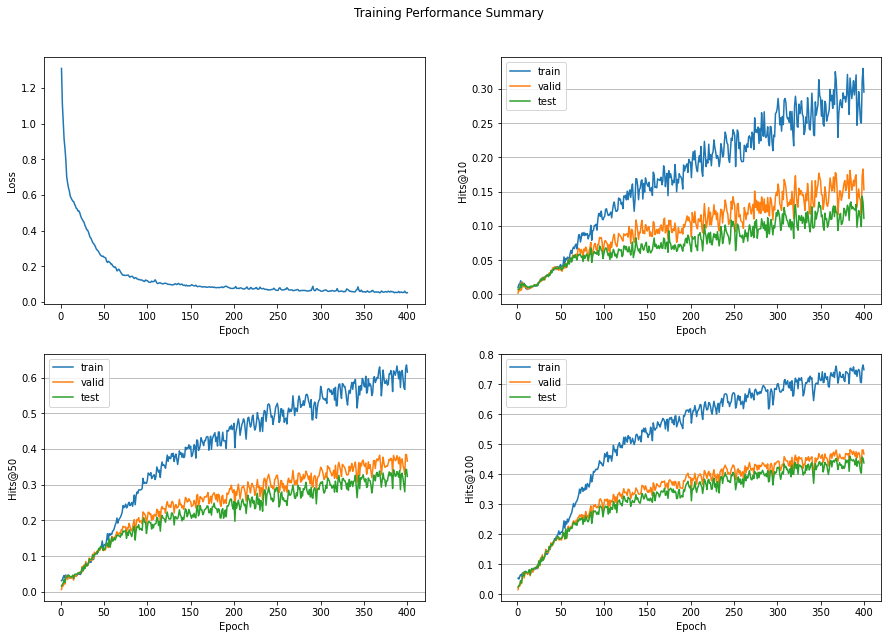

In [27]:
plot_summary(dir_path+'collab_sage_iso.csv')

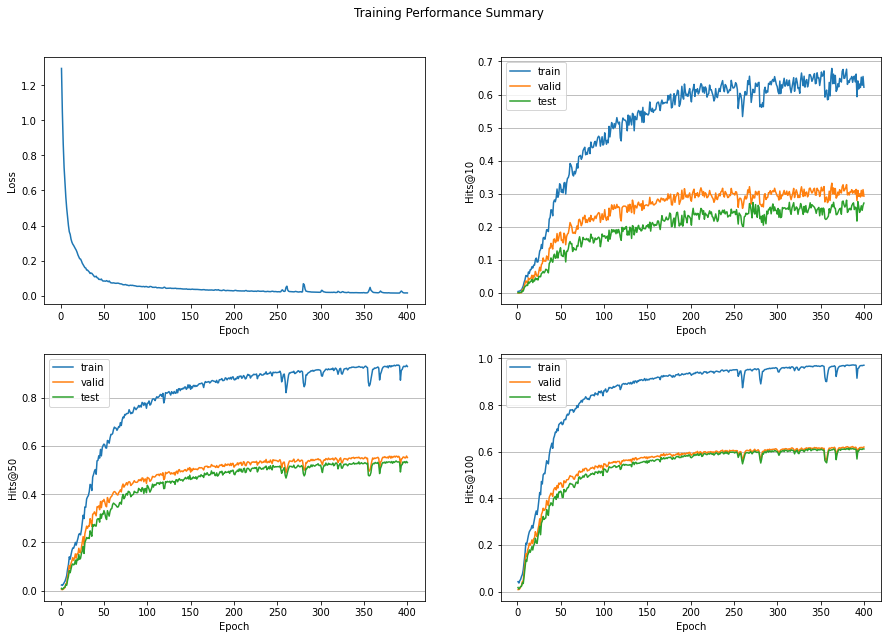

In [29]:
plot_summary(dir_path+'collab_sage_link.csv')

In [30]:
file_names = [x for x in os.listdir(dir_path) if x.startswith('ddi_sage_')]

In [31]:
file_names

['ddi_sage_iso_layers.csv',
 'ddi_sage_iso_lr.csv',
 'ddi_sage_iso_channels.csv',
 'ddi_sage_iso_lrv2.csv',
 'ddi_sage_linear.csv',
 'ddi_sage_iso.csv',
 'ddi_sage_link.csv',
 'ddi_sage_diff.csv']

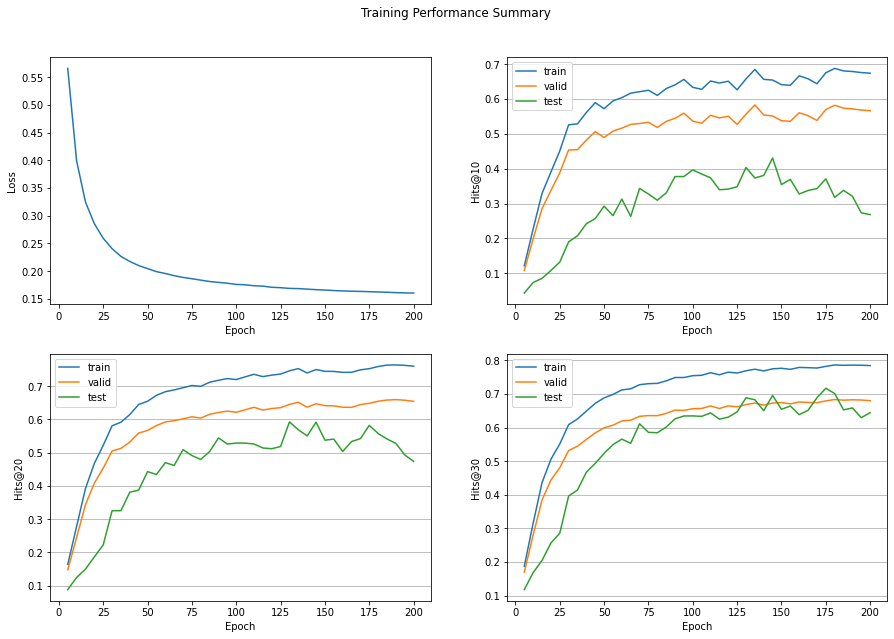

In [32]:
plot_summary(dir_path+'ddi_sage_link.csv')

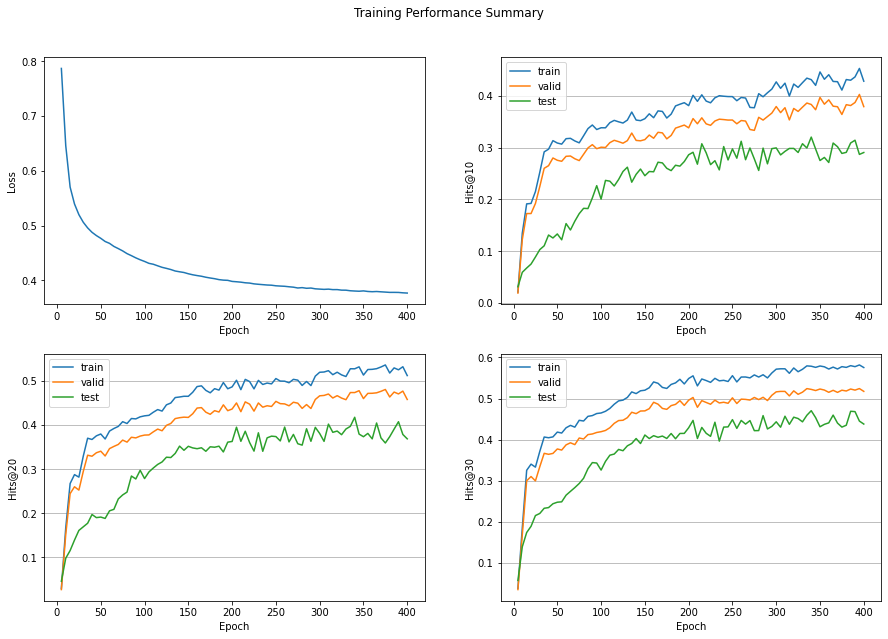

In [33]:
plot_summary(dir_path+'ddi_sage_iso_lrv2.csv')

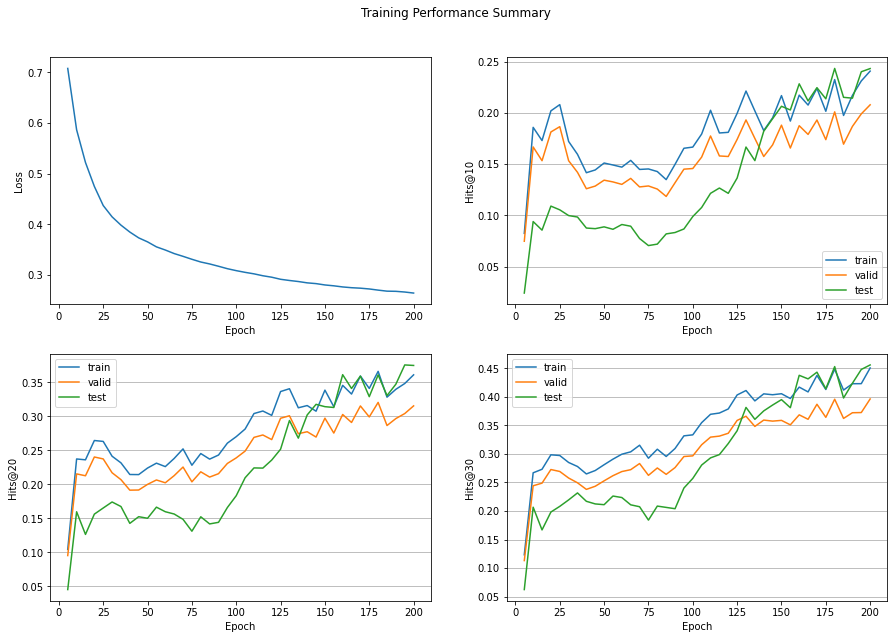

In [34]:
plot_summary(dir_path+'ddi_gcn_link.csv')

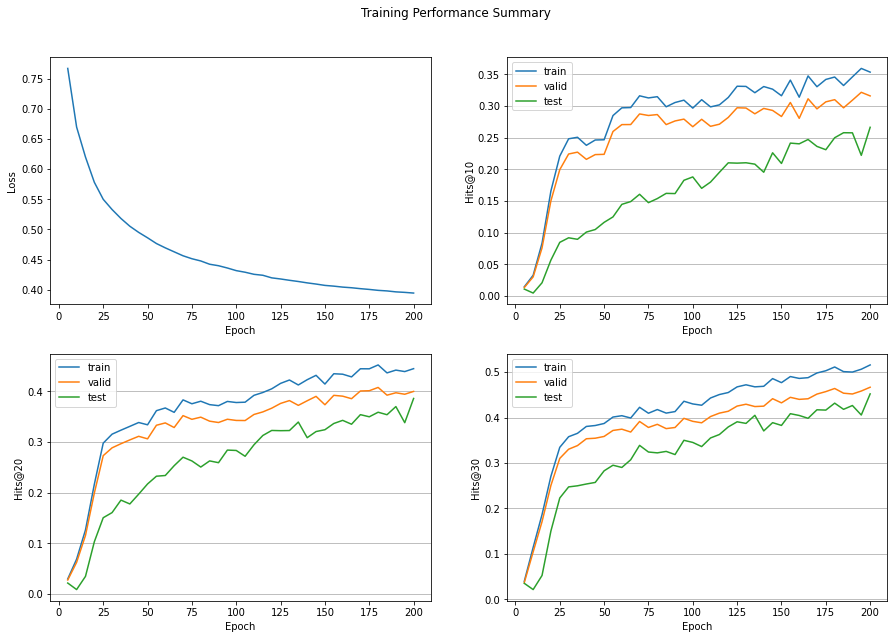

In [35]:
plot_summary(dir_path+'ddi_gcn_iso.csv')